In [22]:
import pandas as pd
import numpy as np

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
sns.set(rc={'figure.figsize': (9,6)})

In [25]:
events_data = pd.read_csv('event_data_train.csv')

In [242]:
submissions_data = pd.read_csv('submissions_data_train.csv')

In [27]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [28]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [29]:
# создаем колонку с датой
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')


In [243]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')

In [30]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [31]:
# последнее событие на курсе
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [32]:
# первое событие на курсе
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [33]:
# создаем колонку с днем
events_data['day'] = events_data.date.dt.date


In [244]:
submissions_data['day'] = submissions_data.date.dt.date

In [34]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [35]:
events_data.query('action == "started_attempt"')

,step_id,timestamp,action,user_id,date,day
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15
15,32812,1434341016,started_attempt,17632,2015-06-15 04:03:36,2015-06-15
73,32929,1434342100,started_attempt,442,2015-06-15 04:21:40,2015-06-15
80,32812,1434342114,started_attempt,442,2015-06-15 04:21:54,2015-06-15
81,32812,1434342148,started_attempt,442,2015-06-15 04:22:28,2015-06-15
...,...,...,...,...,...,...
3480640,32810,1526769245,started_attempt,11677,2018-05-19 22:34:05,2018-05-19
3480646,31988,1526769722,started_attempt,19410,2018-05-19 22:42:02,2018-05-19
3480655,31986,1526769997,started_attempt,19410,2018-05-19 22:46:37,2018-05-19
3480662,32089,1526770169,started_attempt,19410,2018-05-19 22:49:29,2018-05-19


In [226]:
submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


<AxesSubplot:xlabel='day'>

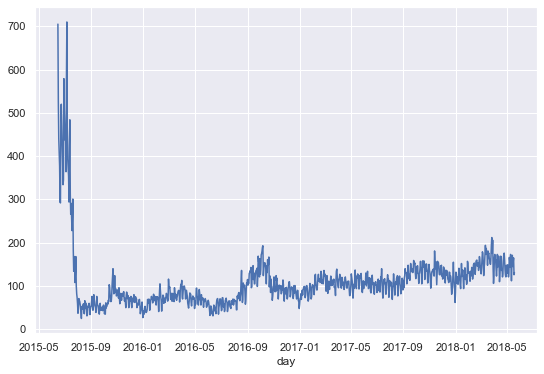

In [37]:
# Активность студентов по дням
events_data.groupby('day')\
    .user_id.nunique().plot()

In [38]:
# ищем сколько заданий выполнил каждый студент
# этот вариант не правильный
# потому что теряется часть студентов, которые не решили ни одного задания
passed_stud = events_data.query('action == "passed"') \
    .groupby('user_id', as_index = False)\
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id': 'passed_steps'})

In [39]:
passed_stud.head()

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


<AxesSubplot:>

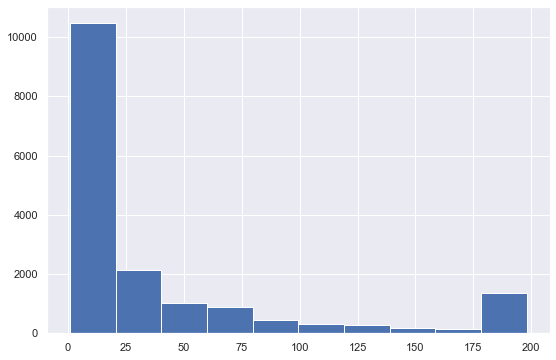

In [40]:
# зависимость количества студетнов от пройденных шагов
passed_stud.passed_steps.hist()

In [41]:
passed_stud.user_id.nunique() == 

SyntaxError: invalid syntax (<ipython-input-41-224a8166e912>, line 1)

In [ ]:
events_data.user_id.nunique()

In [ ]:
# видно, что во время предпроцессинга мы потеряли данные, 
# а именно студентов не сдавших ни одного теста
events_data.user_id.nunique() == passed_stud.user_id.nunique()

In [ ]:
# правильный вариант с учетом всех студентов
users_events_data = events_data.pivot_table(index='user_id',
                        columns='action',
                        values= 'step_id',
                        aggfunc= 'count',
                        fill_value=0).reset_index()

In [ ]:
users_events_data.head()

In [ ]:
users_events_data.discovered.hist()

In [ ]:
submissions_data.head()

In [ ]:
# находим колличество правильных ответов студентов
users_scores = submissions_data.pivot_table(index='user_id', 
                             columns='submission_status', 
                             values='step_id', 
                             aggfunc='count',
                             fill_value=0).reset_index()

In [ ]:
users_scores.head()

In [ ]:
users_scores.correct.hist()

In [ ]:
events_data.head()

In [ ]:
# смотрим промежутки времени между днями посещения курса
gap_data =events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list).apply(np.diff).values
gap_data

In [ ]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))
gap_data.head()

In [ ]:
gap_data = gap_data / (24*60*60)
gap_data.head()

In [ ]:
gap_data[gap_data < 100].hist()

In [ ]:
gap_data.quantile(0.93)

In [ ]:
users_scores.head()

In [ ]:
# Анатолия Карпалогия
users_scores.query('correct == correct.max()')

In [ ]:
events_data.head()

In [ ]:
# время на текущий момент
now = events_data.timestamp.max()

In [ ]:
# если студент не заходит больше этого времени, то с вероятностью 90 процентов он отвалился
max_timestamp = 30*24*60*60

In [ ]:
users_data = events_data.groupby('user_id', as_index=False).agg({'timestamp':'max'})

In [ ]:
users_data['is_gone'] = (now - users_data.timestamp) > max_timestamp

In [ ]:
users_data.rename(columns={"timestamp": "absence_time" }).head(5)

In [ ]:
users_scores.head()

In [ ]:
# используя функию merge обЪеденили 2 датафрейма по общей колонке user_id
users_data= users_data.merge(users_scores, on='user_id', how='outer')

In [ ]:
# заполнили все Nan значения нулями
users_data = users_data.fillna(0)

In [ ]:
# создаем датафрем с числом уникальных дней на курсе
users_day = events_data.groupby('user_id').day.nunique().to_frame().reset_index()
users_day = users_day.rename(columns={'day':'unique_days'})

In [ ]:
users_data = users_data.merge(users_events_data, on='user_id', how='outer')

In [ ]:
users_data = users_data.merge(users_day, on='user_id', how='outer')

In [ ]:
users_data['passed_course'] = users_data.passed > 170

In [ ]:
users_data.rename(columns={'timestamp':'last_timestamp'}).head()

In [ ]:
# проверяем не потеряли ли кого нибудь
users_data.user_id.nunique() == events_data.user_id.nunique()

In [ ]:
users_data.groupby('passed_course').agg({"user_id": 'count'})


In [ ]:
# проверка на адекватность наших результатов
# процент прошедших курс 8% 

100* 1425/17809

In [ ]:
# Сохранил предобработанные данные в новый датафрейм
#users_data.to_csv('users_data.csv', index=False)

In [96]:
users_data = pd.read_csv('users_data.csv')

In [97]:
users_data = users_data.rename(columns={'timestamp': 'last_timestamp'})

In [98]:
users_data.head()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,unique_days,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [162]:
# заносим первое время посещения в новый фрейм
users_time = events_data.groupby('user_id').agg({'timestamp' : 'min'}).reset_index()

In [163]:
users_time = users_min_time.rename(columns={'timestamp' : "min_timestamp"})

In [164]:
# добавляем min_timestamp в наш фрейм
users_data = users_data.merge(users_time, how='outer')

In [165]:
users_data.head()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,unique_days,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [169]:
temp_events_data = events_data.merge(users_min_time, how='outer')

In [160]:
time_threshold = 3*24*60*60
time_threshold

259200

In [166]:
users_time['time_threshold'] = users_time.min_timestamp + time_threshold

In [170]:
temp_events_data = temp_events_data.merge(users_time,how='outer')

In [179]:
events_data_train = temp_events_data[temp_events_data.timestamp < temp_events_data.time_threshold]

In [180]:
events_data_train.shape

(1014980, 8)

In [209]:
# Задача. Найшли степ, где самое большое количество неправильных ответов

df = submissions_data.query('submission_status == "wrong"')\
    .groupby('step_id',as_index = False)\
    .agg({'submission_status' : 'count'}).sort_values('submission_status', ascending=False )
df

,step_id,submission_status
4,31978,16084
11,32031,13373
19,32202,13002
44,33481,10300
12,32075,10003
...,...,...
45,33482,707
59,33681,703
36,33362,673
16,32175,342


In [211]:
# проверяем, что максимально число дней на курсе не прывышает наше ограничение в 3 дня
events_data_train.groupby('user_id').day.nunique().max()

4

In [245]:
temp_submissions_data =  submissions_data.merge(users_time[['user_id','time_threshold']])
submissions_data_train = temp_submissions_data[temp_submissions_data.timestamp < temp_submissions_data.time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [241]:
submissions_data_train

,step_id,timestamp,submission_status,user_id,time_threshold
0,31971,1434349275,correct,15853,1434605177
1,31972,1434348300,correct,15853,1434605177
4,31976,1434348123,wrong,15853,1434605177
5,31976,1434348188,correct,15853,1434605177
7,31977,1434347371,correct,15853,1434605177
...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,1502205860
509100,120745,1503059927,correct,13177,1503314487
509101,120745,1506348153,wrong,15253,1506606463
509102,120745,1523035316,wrong,1424,1523294469


In [228]:
users_time

,user_id,min_timestamp,time_threshold
0,1,1472827464,1473086664
1,2,1514383364,1514642564
2,3,1434358476,1434617676
3,5,1466156809,1466416009
4,7,1521634660,1521893860
...,...,...,...
19229,26790,1451484016,1451743216
19230,26793,1510225031,1510484231
19231,26794,1495287049,1495546249
19232,26797,1508425316,1508684516


In [ ]:
temp_submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
temp_submissions_data = temp_submissions_data.merge(users_time[['user_id', 'time_threshold']], how='outer')
submissions_data_train = temp_submissions_data[temp_submissions_data.users_time <= temp_submissions_data.time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()